In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
two_blobs=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning(Practical & coding)\\DATA\\cluster_two_blobs.csv")

In [3]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

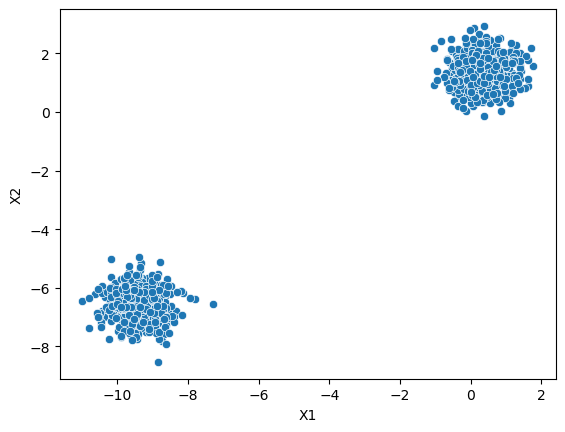

In [4]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

In [7]:
two_blobs_outliers=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning(Practical & coding)\\DATA\\cluster_two_blobs_outliers.csv")

In [8]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

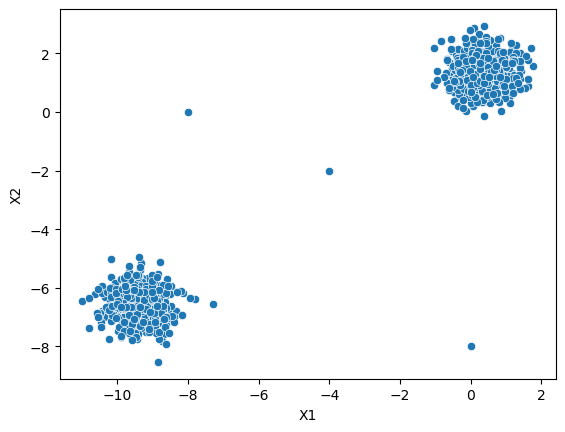

In [9]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [10]:
def display_categories(model,data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')


In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan=DBSCAN()

In [13]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

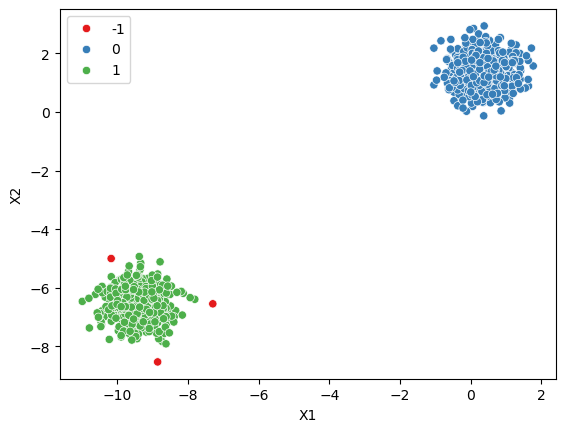

In [14]:
display_categories(dbscan,two_blobs)

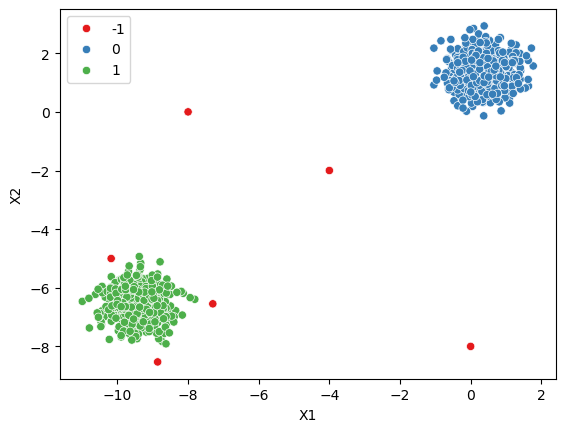

In [15]:
display_categories(dbscan,two_blobs_outliers)

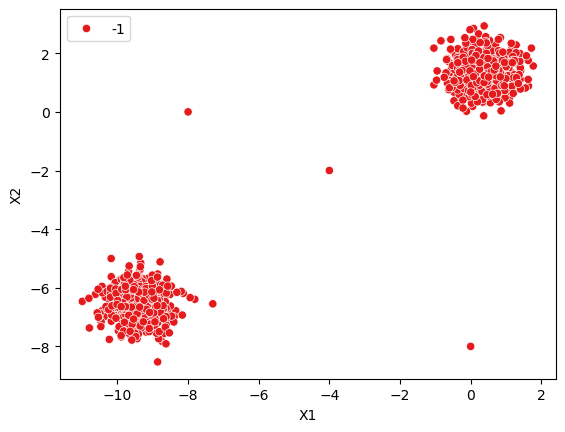

In [16]:
dbscan=DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

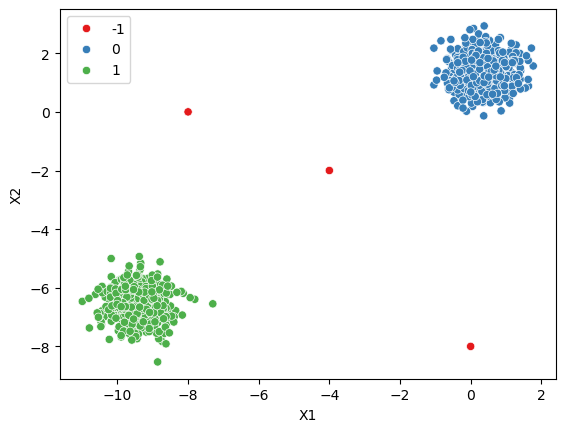

In [37]:
dbscan=DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

In [18]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [19]:
# to calculate how many outliers are present in it 
np.sum(dbscan.labels_==-1)

3

In [21]:
#total percent of points classified as outliers
100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)

0.29910269192422734

In [26]:
outliers_percent=[]
number_of_outlier=[]
for eps in np.linspace(0.0001,7,200):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    #total outlier found
    number_of_outlier.append(np.sum(dbscan.labels_==-1))
    #percent of point classified as outlier
    perc_outlier=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    outliers_percent.append(perc_outlier)

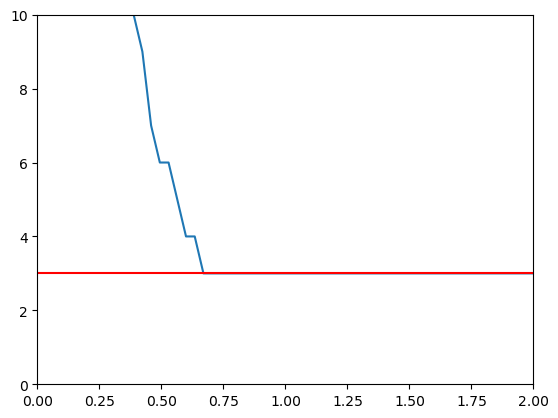

In [36]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outlier)
plt.xlim(0,2)  # it's now smooth
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,colors='red')

Text(0, 0.5, 'Percent of Point classified as Outlier')

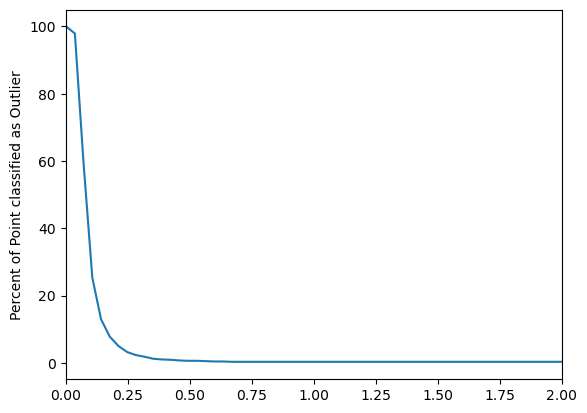

In [34]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outliers_percent)
plt.xlim(0,2)  
plt.ylabel("Percent of Point classified as Outlier")

(0.0, 2.0)

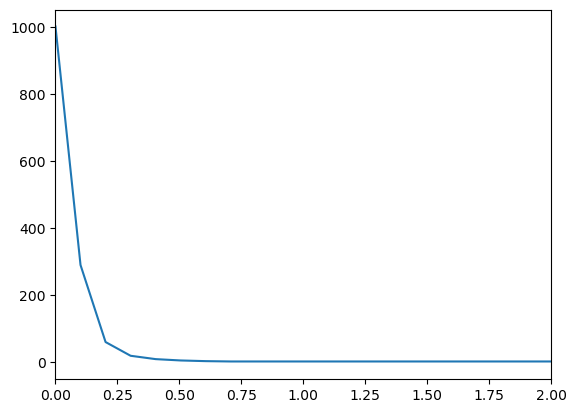

In [25]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outlier)
plt.xlim(0,2) # it not smooth

In [38]:
outliers_percent=[]
number_of_outlier=[]
for n in np.arange(1,100):
    dbscan=DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    #total outlier found
    number_of_outlier.append(np.sum(dbscan.labels_==-1))
    #percent of point classified as outlier
    perc_outlier=100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    outliers_percent.append(perc_outlier)

Text(0, 0.5, 'Pct.of points classified as an outlier')

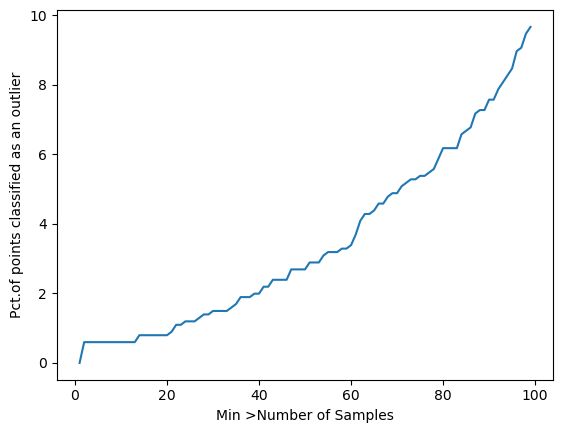

In [40]:
sns.lineplot(x=np.arange(1,100),y=outliers_percent)
plt.xlabel("Min >Number of Samples")
plt.ylabel("Pct.of points classified as an outlier")

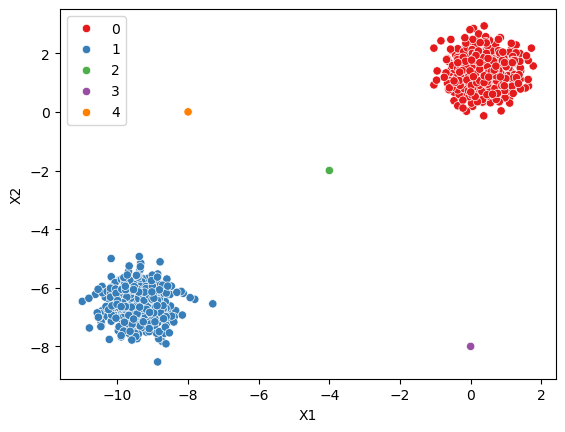

In [41]:
dbscan=DBSCAN(min_samples=1,eps=0.75)
display_categories(dbscan,two_blobs_outliers)

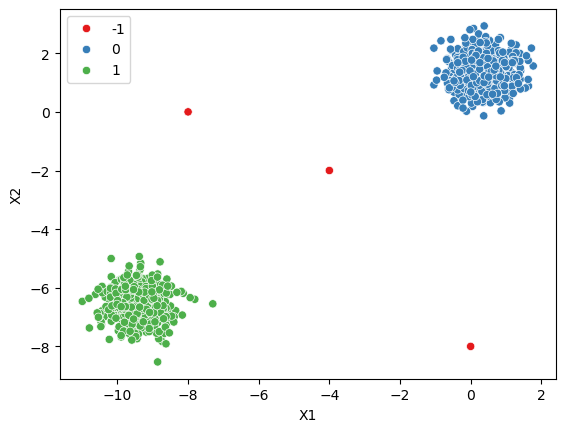

In [42]:
num_dimension=two_blobs_outliers.shape[1]
dbscan=DBSCAN(min_samples=2*num_dimension,eps=0.75)
display_categories(dbscan,two_blobs_outliers)
